# Data Import - Working with Web APIs and JSON (Movies Dataset) PART 1

# HOW TO GET JSONS FROM API AND TRANSFORM INTO A DATAFRAME

In [1]:
import pandas as pd
import json
import requests

## 1st: CREATEAN ACCOUNT AND GET THE PERSONAL API KEY

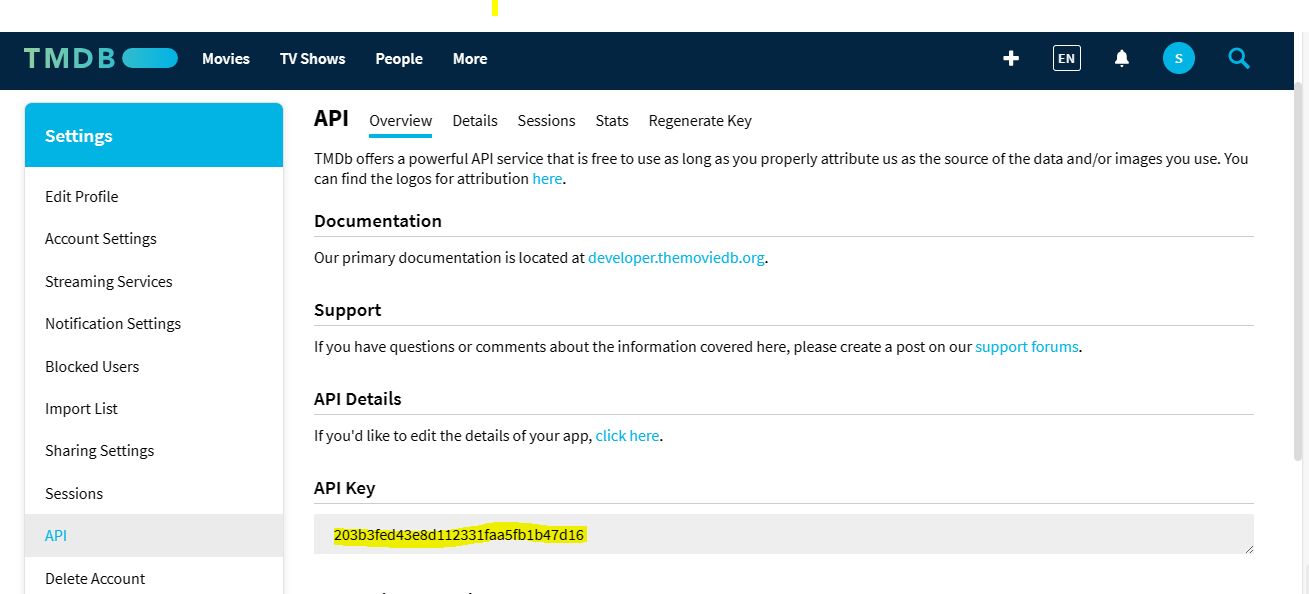

In [2]:
api_key = '203b3fed43e8d112331faa5fb1b47d16'

## 2nd: GET THE URL OF WHATEVER YOU WANT IN THE API REFERENCE TAB AND ADD YOUR API KEY

1. **In this case im gonna work with the "NOW PLAYING" movies tab:**
2. **After that copy the link until the question mark (included and we add the personal key)**

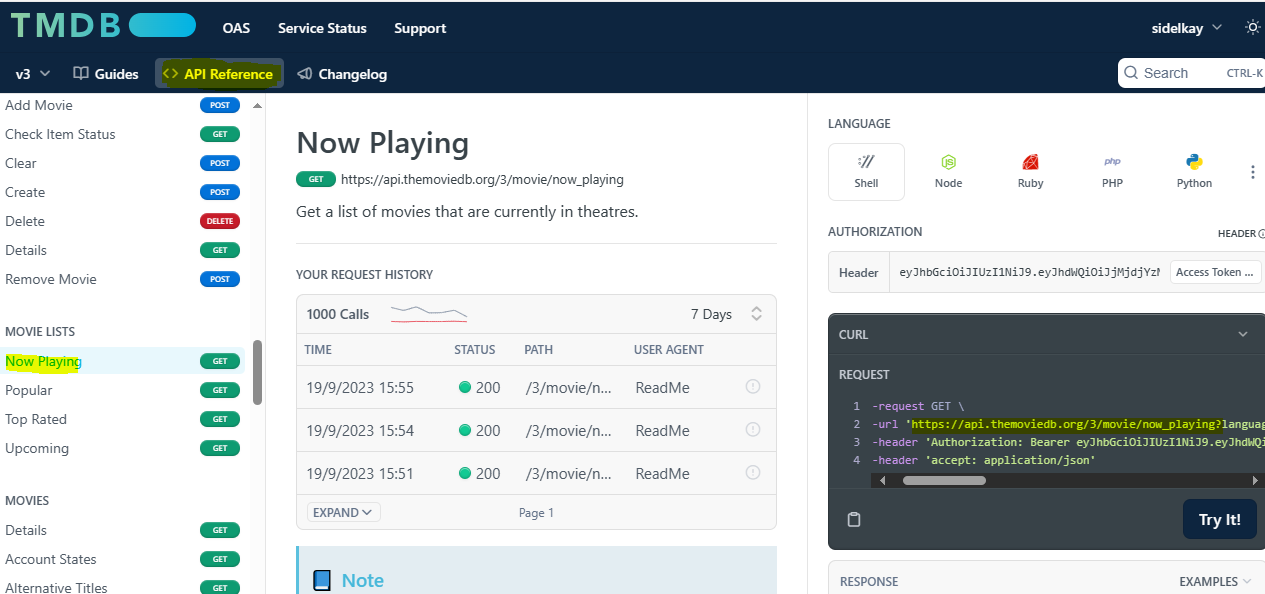

In [3]:
url = 'https://api.themoviedb.org/3/movie/now_playing?'

In [6]:
movie_api = url + 'api_key=' + api_key
movie_api

'https://api.themoviedb.org/3/movie/now_playing?api_key=203b3fed43e8d112331faa5fb1b47d16'

### Now we have to make the request to the API to get the json data

In [7]:
r = requests.get(movie_api)
r

<Response [200]>

In [8]:
data = r.json()
data

{'dates': {'maximum': '2023-09-18', 'minimum': '2023-08-01'},
 'page': 1,
 'results': [{'adult': False,
   'backdrop_path': '/55Rb9qt3yzyF4KQpC1c3T3Fbcao.jpg',
   'genre_ids': [27, 53],
   'id': 1008042,
   'original_language': 'en',
   'original_title': 'Talk to Me',
   'overview': 'When a group of friends discover how to conjure spirits using an embalmed hand, they become hooked on the new thrill, until one of them goes too far and unleashes terrifying supernatural forces.',
   'popularity': 2583.568,
   'poster_path': '/kdPMUMJzyYAc4roD52qavX0nLIC.jpg',
   'release_date': '2023-07-26',
   'title': 'Talk to Me',
   'video': False,
   'vote_average': 7.3,
   'vote_count': 656},
  {'adult': False,
   'backdrop_path': '/ctMserH8g2SeOAnCw5gFjdQF8mo.jpg',
   'genre_ids': [35, 12, 14],
   'id': 346698,
   'original_language': 'en',
   'original_title': 'Barbie',
   'overview': 'Barbie and Ken are having the time of their lives in the colorful and seemingly perfect world of Barbie Land. How

In [10]:
#we convert to json to dataframe
df = pd.Series(data).to_frame().T
df.head()

,dates,page,results,total_pages,total_results
0,"{'maximum': '2023-09-18', 'minimum': '2023-08-...",1,"[{'adult': False, 'backdrop_path': '/55Rb9qt3y...",95,1886


## 3rd: NORMALIZE THE DATAFRAME

In [13]:
df['dates'][0]

{'maximum': '2023-09-18', 'minimum': '2023-08-01'}

In [14]:
#This column is a list of dictionaries, so we have to convert it into a df.
df['results'][0]

[{'adult': False,
  'backdrop_path': '/55Rb9qt3yzyF4KQpC1c3T3Fbcao.jpg',
  'genre_ids': [27, 53],
  'id': 1008042,
  'original_language': 'en',
  'original_title': 'Talk to Me',
  'overview': 'When a group of friends discover how to conjure spirits using an embalmed hand, they become hooked on the new thrill, until one of them goes too far and unleashes terrifying supernatural forces.',
  'popularity': 2583.568,
  'poster_path': '/kdPMUMJzyYAc4roD52qavX0nLIC.jpg',
  'release_date': '2023-07-26',
  'title': 'Talk to Me',
  'video': False,
  'vote_average': 7.3,
  'vote_count': 656},
 {'adult': False,
  'backdrop_path': '/ctMserH8g2SeOAnCw5gFjdQF8mo.jpg',
  'genre_ids': [35, 12, 14],
  'id': 346698,
  'original_language': 'en',
  'original_title': 'Barbie',
  'overview': 'Barbie and Ken are having the time of their lives in the colorful and seemingly perfect world of Barbie Land. However, when they get a chance to go to the real world, they soon discover the joys and perils of living amo

In [22]:
normalized_results = pd.concat([pd.json_normalize(x) for x in df['results']], ignore_index=False)
normalized_results.head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/55Rb9qt3yzyF4KQpC1c3T3Fbcao.jpg,"[27, 53]",1008042,en,Talk to Me,When a group of friends discover how to conjur...,2583.568,/kdPMUMJzyYAc4roD52qavX0nLIC.jpg,2023-07-26,Talk to Me,False,7.3,656
1,False,/ctMserH8g2SeOAnCw5gFjdQF8mo.jpg,"[35, 12, 14]",346698,en,Barbie,Barbie and Ken are having the time of their li...,2160.191,/iuFNMS8U5cb6xfzi51Dbkovj7vM.jpg,2023-07-19,Barbie,False,7.3,4710
2,False,/8pjWz2lt29KyVGoq1mXYu6Br7dE.jpg,"[28, 878, 27]",615656,en,Meg 2: The Trench,An exploratory dive into the deepest depths of...,1936.265,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,2023-08-02,Meg 2: The Trench,False,7.0,1809
3,False,/53z2fXEKfnNg2uSOPss2unPBGX1.jpg,"[27, 9648, 53]",968051,en,The Nun II,"In 1956 France, a priest is violently murdered...",1456.781,/5gzzkR7y3hnY8AD1wXjCnVlHba5.jpg,2023-09-06,The Nun II,False,6.6,218
4,False,/c6Splshb8lb2Q9OvUfhpqXl7uP0.jpg,"[28, 53]",717930,en,Kandahar,"After his mission is exposed, an undercover CI...",1348.023,/lCanGgsqF4xD2WA5NF8PWeT3IXd.jpg,2023-05-25,Kandahar,False,6.8,503


# Data Import - Working with Web APIs and JSON (Movies Dataset) PART 2

## IMPORTING JSON FILES (OPEN AND PD.READ_JSON)

### IMPORTING WITH OPEN

In [23]:
with open ('blockbusters.json') as f:
    data = json.load(f)

In [24]:
data

[{'title': 'Avengers: Endgame',
  'id': 299534,
  'revenue': 2797800564,
  'genres': [{'id': 12, 'name': 'Adventure'},
   {'id': 878, 'name': 'Science Fiction'},
   {'id': 28, 'name': 'Action'}],
  'belongs_to_collection': {'id': 86311,
   'name': 'The Avengers Collection',
   'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
   'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
  'runtime': 181},
 {'title': 'Avatar',
  'id': 19995,
  'revenue': 2787965087,
  'genres': [{'id': 28, 'name': 'Action'},
   {'id': 12, 'name': 'Adventure'},
   {'id': 14, 'name': 'Fantasy'},
   {'id': 878, 'name': 'Science Fiction'}],
  'belongs_to_collection': {'id': 87096,
   'name': 'Avatar Collection',
   'poster_path': '/nslJVsO58Etqkk17oXMuVK4gNOF.jpg',
   'backdrop_path': '/8nCr9W7sKus2q9PLbYsnT7iCkuT.jpg'},
  'runtime': 162},
 {'title': 'Star Wars: The Force Awakens',
  'id': 140607,
  'revenue': 2068223624,
  'genres': [{'id': 28, 'name': 'Action'},
   {'id': 12, 'name': 'Adventure'},
   {'id': 8

In [25]:
type(data)

list

In [26]:
len(data)

18

In [27]:
df = pd.DataFrame(data)
df.head()

,title,id,revenue,genres,belongs_to_collection,runtime
0,Avengers: Endgame,299534,2797800564,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...","{'id': 86311, 'name': 'The Avengers Collection...",181
1,Avatar,19995,2787965087,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","{'id': 87096, 'name': 'Avatar Collection', 'po...",162
2,Star Wars: The Force Awakens,140607,2068223624,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","{'id': 10, 'name': 'Star Wars Collection', 'po...",136
3,Avengers: Infinity War,299536,2046239637,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","{'id': 86311, 'name': 'The Avengers Collection...",149
4,Titanic,597,1845034188,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",None,194


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   title                  18 non-null     object
 1   id                     18 non-null     int64 
 2   revenue                18 non-null     int64 
 3   genres                 18 non-null     object
 4   belongs_to_collection  15 non-null     object
 5   runtime                18 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 992.0+ bytes


### IMPORTING WITH PD.READ_JSON()

In [29]:
df = pd.read_json('blockbusters.json')
df.head()

,title,id,revenue,genres,belongs_to_collection,runtime
0,Avengers: Endgame,299534,2797800564,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...","{'id': 86311, 'name': 'The Avengers Collection...",181
1,Avatar,19995,2787965087,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","{'id': 87096, 'name': 'Avatar Collection', 'po...",162
2,Star Wars: The Force Awakens,140607,2068223624,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","{'id': 10, 'name': 'Star Wars Collection', 'po...",136
3,Avengers: Infinity War,299536,2046239637,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","{'id': 86311, 'name': 'The Avengers Collection...",149
4,Titanic,597,1845034188,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",None,194


In [30]:
#tenemos una lista de diccionarios.
df['genres'][0]

[{'id': 12, 'name': 'Adventure'},
 {'id': 878, 'name': 'Science Fiction'},
 {'id': 28, 'name': 'Action'}]

In [32]:
df_genre = pd.json_normalize(data=data, record_path='genres',meta=['title','id'], record_prefix='genre_')
df_genre.head()

,genre_id,genre_name,title,id
0,12,Adventure,Avengers: Endgame,299534
1,878,Science Fiction,Avengers: Endgame,299534
2,28,Action,Avengers: Endgame,299534
3,28,Action,Avatar,19995
4,12,Adventure,Avatar,19995
